In [1]:
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_iris


In [2]:
df = pd.read_csv('./logs/refrigerator_with_state.csv')

# data の 'state' 'time' 以外, NaN を 0 で埋める
data = df.drop(['state', 'time'], axis=1).fillna(0)
# target は 'state'
target = df['state']

# 学習
clf = svm.SVC(gamma="scale")
clf.fit(data, target)


SVC()

In [3]:
# 正答率
test_data = df.drop(['time', 'state'], axis=1).fillna(0)
ans = clf.predict(test_data)

# ans と df['state'] を比較し、一致した割合を出力
print(sum(ans == df['state']) / len(df['state']))


0.8968827648520443


In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib


In [5]:
def plot(
    arr1,
    arr2,
    title,
    xlabel,
    ylabel,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    labels=None
):
    fig = plt.figure(figsize=figsize)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])

    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    if labels:
        colors = ['mediumblue', 'orange', 'green', 'red', 'purple', 'gray', 'olive', 'cyan']
        for i, label in enumerate(labels):
            color = colors[i % len(colors)]
            for s, e in label['times']:
                plt.axvspan(s, e, color=color, alpha=0.2)

    plt.plot(arr1, arr2, label='arr1')
    plt.show()


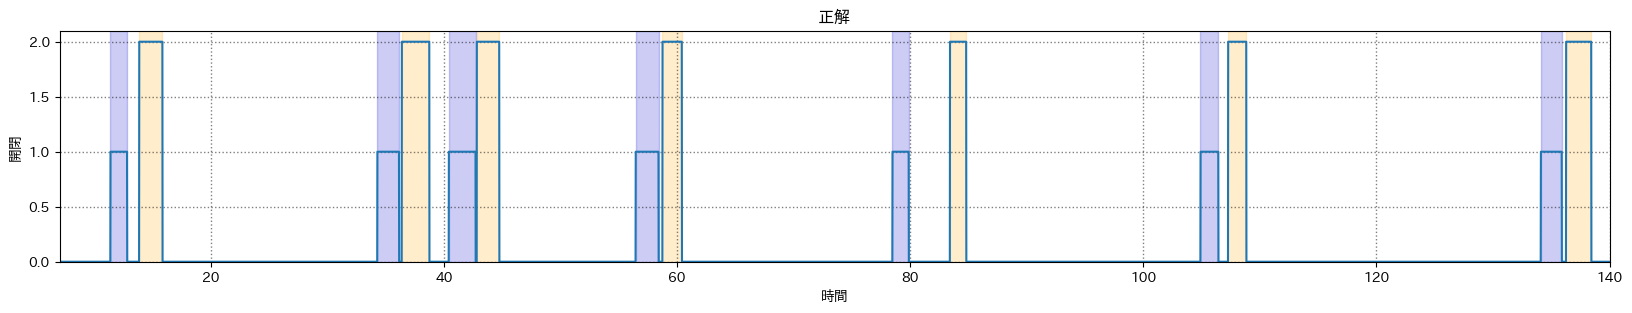

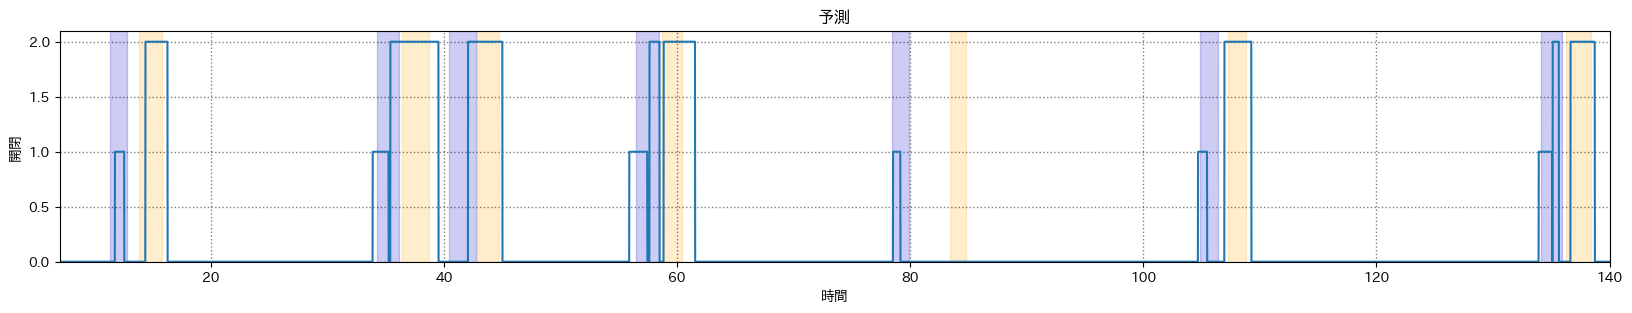

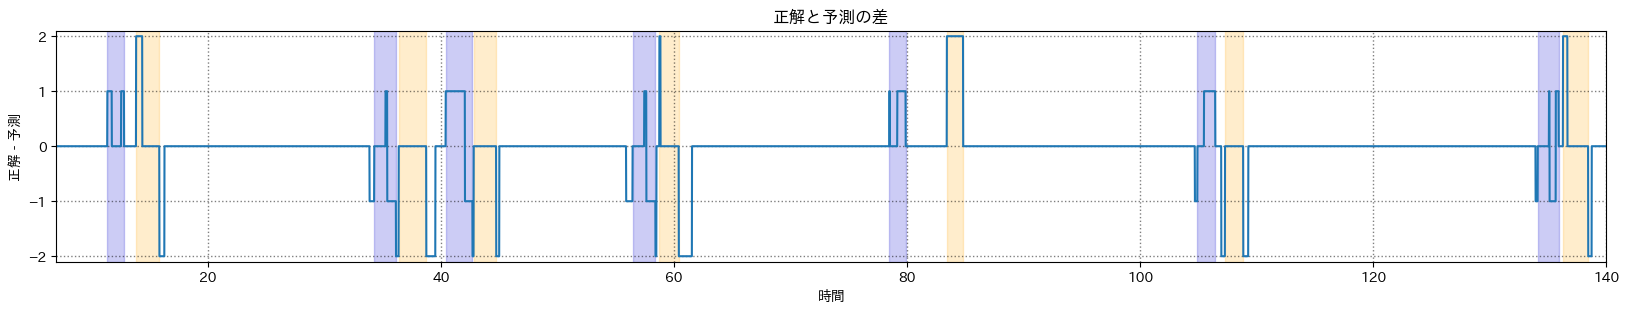

In [6]:
labels = [
    {'num': 1, 'title': '冷蔵庫を開ける', 'times': [[11.366666666666665, 12.8], [34.26666666666666, 36.13333333333333], [40.39999999999999, 42.7], [56.433333333333344, 58.39999999999999], [78.46666666666667, 79.86666666666669], [104.89999999999999, 106.43333333333332], [134.1, 135.90000000000003]]},
    {'num': 2, 'title': '冷蔵庫を閉める', 'times': [[13.833333333333334, 15.833333333333334], [36.36666666666667, 38.73333333333333], [42.800000000000004, 44.73333333333333], [58.73333333333333, 60.39999999999999], [83.40000000000002, 84.79999999999998], [107.26666666666667, 108.83333333333333], [136.2666666666667, 138.4333333333333]]}
]

xlim = (7, 140)
figsize=(20, 3)

# 正解
plot(
    df['time'],
    df['state'],
    '正解',
    '時間',
    '開閉',
    xlim=xlim,
    ylim=(0, 2.1),
    labels=labels,
    figsize=figsize
)

# 予測
plot(
    df['time'],
    ans,
    '予測',
    '時間',
    '開閉',
    xlim=xlim,
    ylim=(0, 2.1),
    labels=labels,
    figsize=figsize
)

# 正解と予測の差
plot(
    df['time'],
    df['state']- ans,
    '正解と予測の差',
    '時間',
    '正解 - 予測',
    xlim=xlim,
    ylim=(-2.1, 2.1),
    labels=labels,
    figsize=figsize
)


In [7]:
# メディアエンコーダのフレーム時間を変換する
frame_rate = 30

labels = [
    {
        'num': 1,
        'title': '冷蔵庫を開ける',
        'times': [
            [11.16, 12.03],
            [34.12, 35.12],
            [40.20, 41.20],
            [56.25, 57.25],
            [78.25, 79.25],
            [105.15, 106.0],
            [134.10, 135.15]
        ]
    },
    {
        'title': '冷蔵庫を閉める',
        'num': 2,
        'times': [
            [14.22, 15.10],
            [36.23, 38.0],
            [43.10, 44.10],
            [59.02, 59.20],
            [83.21, 84.10],
            [107.23, 108.12],
            [136.20, 137.23]
        ]
    },
]

def convert(num):
    # 整数部
    i = int(num)
    # 小数部
    f = num % 1

    return i + f * 100 / frame_rate

# 小数点以下の部分だけを残す
new_labels = [
    {
        'num': label['num'],
        'title': label['title'],
        'times': [
            [convert(time_range[0]), convert(time_range[1])]
            for time_range in label['times']
        ]
    }
    for label in labels
]

print(new_labels)


[{'num': 1, 'title': '冷蔵庫を開ける', 'times': [[11.533333333333333, 12.099999999999998], [34.39999999999999, 35.39999999999999], [40.66666666666668, 41.66666666666668], [56.833333333333336, 57.833333333333336], [78.83333333333333, 79.83333333333333], [105.50000000000001, 106.0], [134.33333333333331, 135.50000000000003]]}, {'num': 2, 'title': '冷蔵庫を閉める', 'times': [[14.733333333333336, 15.333333333333332], [36.76666666666666, 38.0], [43.333333333333336, 44.333333333333336], [59.06666666666668, 59.66666666666668], [83.69999999999997, 84.33333333333331], [107.76666666666668, 108.40000000000002], [136.66666666666663, 137.76666666666662]]}]


In [8]:
# ラベル倉庫
## 大まかに
labels = [
    {'title': '冷蔵庫を開ける', 'num': 1, 'times': [[10, 12], [33, 35], [39, 41], [55, 57], [77.5, 79.5], [104, 106], [133, 135]]},
    {'title': '冷蔵庫を閉める', 'num': 2, 'times': [[14, 16], [36, 38], [42, 45], [58, 60], [82, 84], [106.5, 108.5], [135, 137]]},
]

## 超丁寧(動作開始の瞬間から終了の瞬間まで)
labels = [
    {'num': 1, 'title': '冷蔵庫を開ける', 'times': [[11.366666666666665, 12.8], [34.26666666666666, 36.13333333333333], [40.39999999999999, 42.7], [56.433333333333344, 58.39999999999999], [78.46666666666667, 79.86666666666669], [104.89999999999999, 106.43333333333332], [134.1, 135.90000000000003]]},
    {'num': 2, 'title': '冷蔵庫を閉める', 'times': [[13.833333333333334, 15.833333333333334], [36.36666666666667, 38.73333333333333], [42.800000000000004, 44.73333333333333], [58.73333333333333, 60.39999999999999], [83.40000000000002, 84.79999999999998], [107.26666666666667, 108.83333333333333], [136.2666666666667, 138.4333333333333]]}
]

## 確実に動作している部分のみ
labels = [
    {'num': 1, 'title': '冷蔵庫を開ける', 'times': [[11.533333333333333, 12.099999999999998], [34.39999999999999, 35.39999999999999], [40.66666666666668, 41.66666666666668], [56.833333333333336, 57.833333333333336], [78.83333333333333, 79.83333333333333], [105.50000000000001, 106.0], [134.33333333333331, 135.50000000000003]]},
    {'num': 2, 'title': '冷蔵庫を閉める', 'times': [[14.733333333333336, 15.333333333333332], [36.76666666666666, 38.0], [43.333333333333336, 44.333333333333336], [59.06666666666668, 59.66666666666668], [83.69999999999997, 84.33333333333331], [107.76666666666668, 108.40000000000002], [136.66666666666663, 137.76666666666662]]}
]